The goal of this project is to create a Decision Tree classifier that can predict the species of an Iris flower based on its physical measurements: sepal length, sepal width, petal length, and petal width. The classifier is trained on a dataset, and once trained, it can be used to predict the species of new Iris flowers based on these measurements.

In [ ]:
%pip install pandas numpy scikit-learn matplotlib


1. Load the Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Iris.csv')

# Explore the dataset
print(df.head())
print(df.info())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


2.Dataset Preparation :
 data often needs to be cleaned and transformed. For example, the Id column is irrelevant for prediction, and the Species column needs to be converted into numerical values for the model to process.

In [3]:
# Drop the Id column
df = df.drop('Id', axis=1)

# Convert Species to numerical values
df['Species'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Check the modified dataframe
print(df.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


3.Split the Data :
To evaluate the model's performance, it's important to train it on one portion of the data and test it on another. This helps ensure the model generalizes well to unseen data.

X = df.drop('Species', axis=1) selects all columns except Species as features.
y = df['Species'] selects the Species column as the target variable.
train_test_split splits the data into training and testing sets, ensuring the model is evaluated on data it hasn't seen before.

In [4]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


4. Model Training 
Training the model involves teaching it to recognize patterns in the data so it can make accurate predictions.
    DecisionTreeClassifier() creates an instance of the Decision Tree model.
    model.fit(X_train, y_train) trains the model using the training data (features and target).

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier()

5. Make Predictions and Evaluate the Model
Evaluating the model tells you how well it performs on unseen data, which is crucial for determining its accuracy and reliability.

In [6]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



6. Visualize the Decision Tree
Visualizing the Decision Tree helps you understand how the model makes decisions, which features are important, and the overall structure of the tree.

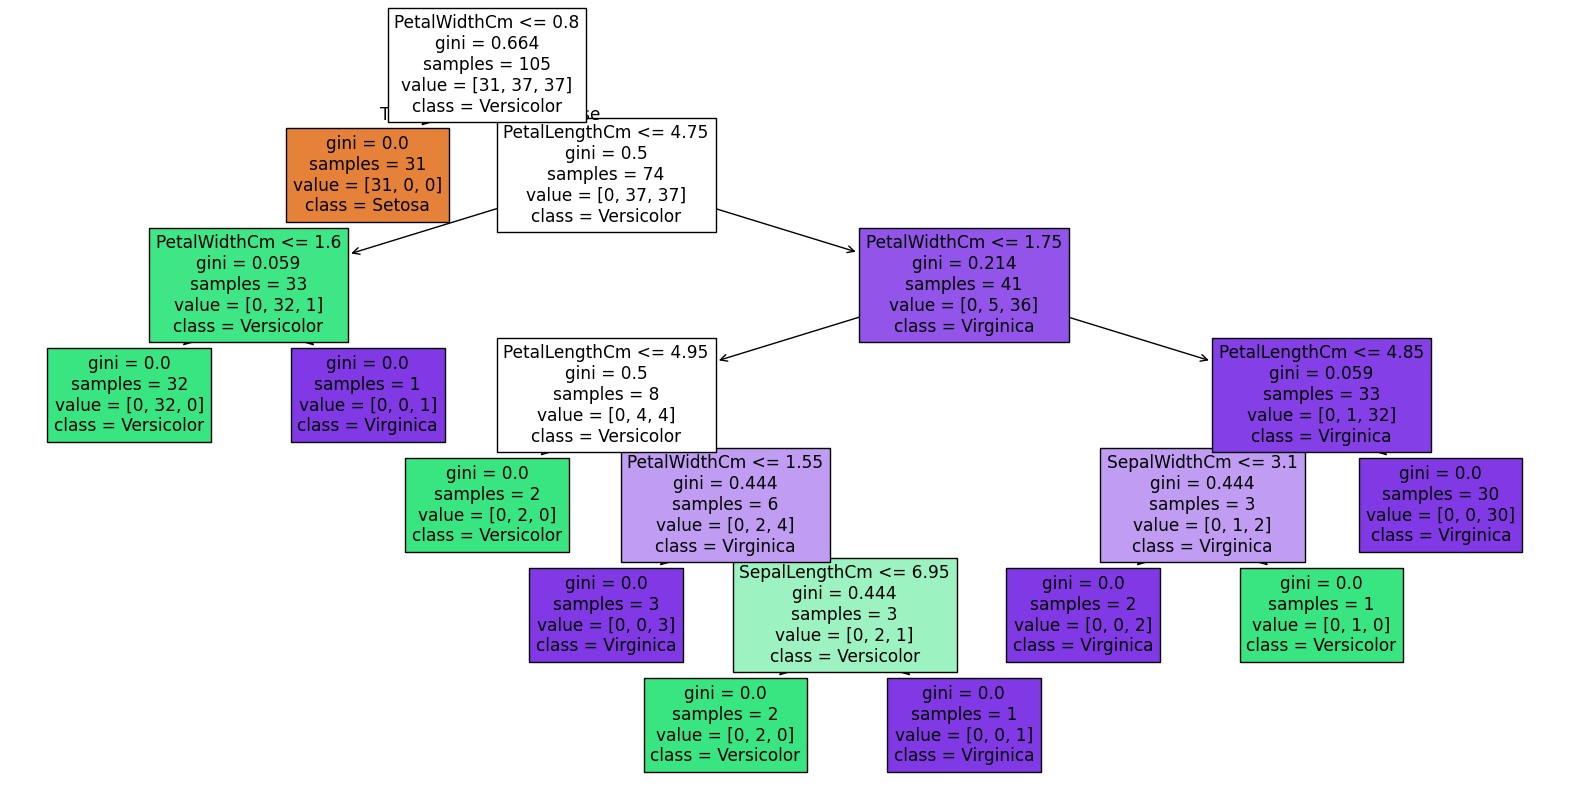

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Setosa', 'Versicolor', 'Virginica'])
plt.show()
